## Cardiovascular Disease Data Science Project

### Data Preprocessing:

#### CVD Death Dataset

In [39]:
import pandas as pd
# Load the Excel file to inspect sheet names
excel_path = "CVD-death.xlsx"
xls = pd.ExcelFile(excel_path)
sheet_names = xls.sheet_names
sheet_names

['Contents ',
 'Notes',
 'PHA_CVD_DEATH_SEX',
 'PHN_CVD_DEATH_SEX',
 'PHN_CVD_DEATH_AGE&SEX',
 'STATE_CVD_DEATH_SEX',
 'STATE_CVD_DEATH_AGE&SEX']

##### PHN_CVD_DEATH_AGE&SEX

In [40]:
# Load and preview the 'PHA_CVD_DEATH_SEX' sheet
df2 = xls.parse('PHN_CVD_DEATH_AGE&SEX', skiprows=9)
df2.head()

,Unnamed: 0,Unnamed: 1,Persons aged 0–54,Unnamed: 3,Unnamed: 4,Unnamed: 5,Persons aged 55–74,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 27,Unnamed: 28,Unnamed: 29,Females aged 55–74,Unnamed: 31,Unnamed: 32,Unnamed: 33,Females aged 75+,Unnamed: 35,Unnamed: 36
0,Code,Name,Annualised deaths,"Deaths per 100,000",Annualised population,NaN,Annualised deaths,"Deaths per 100,000",Annualised population,NaN,...,"Deaths per 100,000",Annualised population,NaN,Annualised deaths,"Deaths per 100,000",Annualised population,NaN,Annualised deaths,"Deaths per 100,000",Annualised population
1,NaN,Australia,2026.67,11.41,17761316.33,NaN,7701,158.23,4865865.67,NaN,...,6.66,8823137.67,NaN,2364,95.41,2477755.67,NaN,19694.66,2186.51,900643.67
2,PHN101,Central and Eastern Sydney,86.56,7.19,1203539.33,NaN,344.08,127.38,270115,NaN,...,4.2,595109,NaN,91.96,66.56,138163.67,NaN,1083.17,1969.99,54983.67
3,PHN102,Northern Sydney,34.78,5.2,669055,NaN,156.07,88.64,176081.33,NaN,...,3.35,336569.67,NaN,41.18,45.07,91354.67,NaN,979.48,2523.13,38820
4,PHN103,Western Sydney,75.25,10.04,749635,NaN,249.93,158.56,157626,NaN,...,4.94,365882.33,NaN,78.18,97.4,80271.67,NaN,479.77,1981.62,24211


In [41]:
# Load with multi-level header (first 2 rows after skipping 9)
df2_multi = xls.parse('PHN_CVD_DEATH_AGE&SEX', skiprows=9, header=[0, 1])

# Flatten multi-level headers: Combine both header rows into a single line with clear labels
df2_multi.columns = [
    f"{str(col1).strip()} - {str(col2).strip()}" if str(col2).strip() != 'nan' else str(col1).strip()
    for col1, col2 in df2_multi.columns
]

# Remove rows where the 'Code' column is NaN (region code column will contain 'Code' string)
df2_multi = df2_multi[df2_multi[df2_multi.columns[0]] != 'Code']
df2_multi = df2_multi[df2_multi[df2_multi.columns[0]].notna()]

# Reset index for clarity
df2_multi.reset_index(drop=True, inplace=True)

for col in df2_multi.columns:
    print(repr(col))

'Unnamed: 0_level_0 - Code'
'Unnamed: 1_level_0 - Name'
'Persons aged 0–54 - Annualised deaths'
'Persons aged 0–54 - Deaths per 100,000'
'Persons aged 0–54 - Annualised population'
'Persons aged 0–54 - Annualised population.1'
'Persons aged 55–74 - Annualised deaths'
'Persons aged 55–74 - Deaths per 100,000'
'Persons aged 55–74 - Annualised population'
'Persons aged 55–74 - Annualised population.1'
'Persons aged 75+ - Annualised deaths'
'Persons aged 75+ - Deaths per 100,000'
'Persons aged 75+ - Annualised population'
'Persons aged 75+ - Annualised population.1'
'Males aged 0–54 - Annualised deaths'
'Males aged 0–54 - Deaths per 100,000'
'Males aged 0–54 - Annualised population'
'Males aged 0–54 - Annualised population.1'
'Males aged 55–74 - Annualised deaths'
'Males aged 55–74 - Deaths per 100,000'
'Males aged 55–74 - Annualised population'
'Males aged 55–74 - Annualised population.1'
'Males aged 75+ - Annualised deaths'
'Males aged 75+ - Deaths per 100,000'
'Males aged 75+ - Annualis

In [42]:
# Step 1: Detect the 'Code' and 'Name' columns
code_col = [col for col in df2_multi.columns if 'Code' in col][0]
name_col = [col for col in df2_multi.columns if 'Name' in col][0]

# Step 2: Define the selected columns
selected_columns = [code_col, name_col] + [
    'Persons aged 0–54 - Annualised deaths',
    'Persons aged 0–54 - Deaths per 100,000',
    'Persons aged 0–54 - Annualised population',
    'Persons aged 55–74 - Annualised deaths',
    'Persons aged 55–74 - Deaths per 100,000',
    'Persons aged 55–74 - Annualised population',
    'Persons aged 75+ - Annualised deaths',
    'Persons aged 75+ - Deaths per 100,000',
    'Persons aged 75+ - Annualised population',
    'Males aged 0–54 - Annualised deaths',
    'Males aged 0–54 - Deaths per 100,000',
    'Males aged 0–54 - Annualised population',
    'Males aged 55–74 - Annualised deaths',
    'Males aged 55–74 - Deaths per 100,000',
    'Males aged 55–74 - Annualised population',
    'Males aged 75+ - Annualised deaths',
    'Males aged 75+ - Deaths per 100,000',
    'Males aged 75+ - Annualised population',
    'Females aged 0–54 - Annualised deaths',
    'Females aged 0–54 - Deaths per 100,000',
    'Females aged 0–54 - Annualised population',
    'Females aged 55–74 - Annualised deaths',
    'Females aged 55–74 - Deaths per 100,000',
    'Females aged 55–74 - Annualised population',
    'Females aged 75+ - Annualised deaths',
    'Females aged 75+ - Deaths per 100,000',
    'Females aged 75+ - Annualised population'
]

# Step 3: Select and rename columns
df2_selected = df2_multi[selected_columns].copy()
df2_selected = df2_selected.rename(columns={code_col: 'Code', name_col: 'Region'})

# Step 4: Melt to long format
df2_final = pd.melt(df2_selected, id_vars=["Code", "Region"],
                    var_name="Group_Metric", value_name="Value")

# Step 5: Extract Group, AgeGroup, and Metric from Group_Metric
df2_final[['Gender', 'AgeGroup', 'Metric']] = df2_final['Group_Metric'].str.extract(r'(\w+) aged ([\d+–]+|\d+\+)\s-\s(.+)')
df2_final.drop(columns="Group_Metric", inplace=True)

# Step 6: Pivot to wide format (optional, if you want metrics as columns)
df2_final_clean = df2_final.pivot_table(index=["Code", "Region", "Gender", "AgeGroup"],
                                        columns="Metric",
                                        values="Value",
                                        aggfunc="first").reset_index()

# Step 7: Convert numeric values safely
for col in df2_final_clean.columns[4:]:
    df2_final_clean[col] = pd.to_numeric(df2_final_clean[col], errors='coerce')
    df2_final_clean["Year"] = "2017-2018"

df2_final_clean.rename(columns={
    "Deaths per 100,000": "DeathRatePer100k",
    'Annualised deaths': 'AnnualisedDeaths',
    'Annualised population': 'AnnualisedPop'
}, inplace=True)


# Step 8: Export final CSV
df2_final_clean.to_csv("PHN_CVD_DEATH_AGE&SEX.csv", index=False, encoding='utf-8-sig')

#### CVD Hospitalisation

In [13]:
import pandas as pd
# Load the Excel file to inspect sheet names
excel_path = "CVD-hospitalisation.xlsx"
xls= pd.ExcelFile(excel_path)
sheet_names = xls.sheet_names
sheet_names

['Contents ',
 'Notes',
 'PHA_CVD_HOSP_SEX_3YR',
 'PHA_CVD_HOSP_AGE&SEX_3YR',
 'PHN_CVD_HOSP_SEX_3YR',
 'PHN_CVD_HOSP_AGE&SEX_3YR',
 'PHN_CVD_HOSP_SEX_1YR',
 'PHN_CVD_HOSP_AGE&SEX_1YR',
 'STATE_CVD_HOSP_SEX_3YR',
 'STATE_CVD_HOSP_AGE&SEX_3YR',
 'STATE_CVD_HOSP_SEX_1YR',
 'STATE_CVD_HOSP_AGE&SEX_1YR']

##### PHN_CVD_HOSP_AGE&SEX_1YR

In [14]:
# Load and preview the 'PHA_CVD_DEATH_SEX' sheet
df5 = xls.parse('PHN_CVD_HOSP_AGE&SEX_1YR', skiprows=9)
df5.head()

,Unnamed: 0,Unnamed: 1,Persons aged 0–54,Unnamed: 3,Unnamed: 4,Unnamed: 5,Persons aged 55–74,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 27,Unnamed: 28,Unnamed: 29,Females aged 55–74,Unnamed: 31,Unnamed: 32,Unnamed: 33,Females aged 75+,Unnamed: 35,Unnamed: 36
0,Code,Name,Annual hospitalisations,"Hospitalisations per 100,000",Annual population,NaN,Annual hospitalisations,"Hospitalisations per 100,000",Annual population,NaN,...,"Hospitalisations per 100,000",Annual population,NaN,Annual hospitalisations,"Hospitalisations per 100,000",Annual population,NaN,Annual hospitalisations,"Hospitalisations per 100,000",Annual population
1,NaN,Australia,98563,545.12,18080976.5,NaN,248584,4920.62,5051884.5,NaN,...,457.8,8983625.5,NaN,89199,3459.07,2578702,NaN,114781,12283.31,934447
2,PHN101,Central and Eastern Sydney,5197.24,419.82,1237964,NaN,13678.04,4877.43,280435.5,NaN,...,319.91,611451,NaN,4707.88,3273.14,143834,NaN,6841.1,12075.02,56655
3,PHN102,Northern Sydney,2807.76,410.98,683183.5,NaN,7912.67,4368.25,181140.5,NaN,...,335.66,343745.5,NaN,2977.35,3168.1,93979,NaN,5456.2,13673.16,39904.5
4,PHN103,Western Sydney,3612.67,463.15,780021,NaN,8093.86,4920.13,164505,NaN,...,372.17,380074,NaN,2681.44,3196.19,83895,NaN,3050.73,11997.04,25429


In [15]:
# Load with multi-level header (first 2 rows after skipping 9)
df5_multi = xls.parse('PHN_CVD_HOSP_AGE&SEX_1YR', skiprows=9, header=[0, 1])

# Flatten multi-level headers: Combine both header rows into a single line with clear labels
df5_multi.columns = [
    f"{str(col1).strip()} - {str(col2).strip()}" if str(col2).strip() != 'nan' else str(col1).strip()
    for col1, col2 in df5_multi.columns
]

# Remove rows where the 'Code' column is NaN (region code column will contain 'Code' string)
df5_multi = df5_multi[df5_multi[df5_multi.columns[0]] != 'Code']
df5_multi = df5_multi[df5_multi[df5_multi.columns[0]].notna()]

# Reset index for clarity
df5_multi.reset_index(drop=True, inplace=True)

for col in df5_multi.columns:
    print(repr(col))

'Unnamed: 0_level_0 - Code'
'Unnamed: 1_level_0 - Name'
'Persons aged 0–54 - Annual hospitalisations'
'Persons aged 0–54 - Hospitalisations per 100,000'
'Persons aged 0–54 - Annual population'
'Persons aged 0–54 - Annual population.1'
'Persons aged 55–74 - Annual hospitalisations'
'Persons aged 55–74 - Hospitalisations per 100,000'
'Persons aged 55–74 - Annual population'
'Persons aged 55–74 - Annual population.1'
'Persons aged 75+ - Annual hospitalisations'
'Persons aged 75+ - Hospitalisations per 100,000'
'Persons aged 75+ - Annual population'
'Persons aged 75+ - Annual population.1'
'Males aged 0–54 - Annual hospitalisations'
'Males aged 0–54 - Hospitalisations per 100,000'
'Males aged 0–54 - Annual population'
'Males aged 0–54 - Annual population.1'
'Males aged 55–74 - Annual hospitalisations'
'Males aged 55–74 - Hospitalisations per 100,000'
'Males aged 55–74 - Annual population'
'Males aged 55–74 - Annual population.1'
'Males aged 75+ - Annual hospitalisations'
'Males aged 75+ - 

In [16]:
import pandas as pd

# Step 1: Detect and rename the 'Code' and 'Name' columns properly
code_col = [col for col in df5_multi.columns if 'Code' in col][0]
name_col = [col for col in df5_multi.columns if 'Name' in col][0]

# Step 2: Define the relevant columns
selected_columns = [code_col, name_col] + [
    'Persons aged 0–54 - Annual hospitalisations',
    'Persons aged 0–54 - Hospitalisations per 100,000',
    'Persons aged 0–54 - Annual population',
    'Persons aged 0–54 - Annual population.1',
    'Persons aged 55–74 - Annual hospitalisations',
    'Persons aged 55–74 - Hospitalisations per 100,000',
    'Persons aged 55–74 - Annual population',
    'Persons aged 55–74 - Annual population.1',
    'Persons aged 75+ - Annual hospitalisations',
    'Persons aged 75+ - Hospitalisations per 100,000',
    'Persons aged 75+ - Annual population',
    'Persons aged 75+ - Annual population.1',
    'Males aged 0–54 - Annual hospitalisations',
    'Males aged 0–54 - Hospitalisations per 100,000',
    'Males aged 0–54 - Annual population',
    'Males aged 0–54 - Annual population.1',
    'Males aged 55–74 - Annual hospitalisations',
    'Males aged 55–74 - Hospitalisations per 100,000',
    'Males aged 55–74 - Annual population',
    'Males aged 55–74 - Annual population.1',
    'Males aged 75+ - Annual hospitalisations',
    'Males aged 75+ - Hospitalisations per 100,000',
    'Males aged 75+ - Annual population',
    'Males aged 75+ - Annual population.1',
    'Females aged 0–54 - Annual hospitalisations',
    'Females aged 0–54 - Hospitalisations per 100,000',
    'Females aged 0–54 - Annual population',
    'Females aged 0–54 - Annual population.1',
    'Females aged 55–74 - Annual hospitalisations',
    'Females aged 55–74 - Hospitalisations per 100,000',
    'Females aged 55–74 - Annual population',
    'Females aged 55–74 - Annual population.1',
    'Females aged 75+ - Annual hospitalisations',
    'Females aged 75+ - Hospitalisations per 100,000',
    'Females aged 75+ - Annual population'
]

# Step 3: Select and rename 'Code' -> 'Code', 'Name' -> 'Region'
df5_selected = df5_multi[selected_columns].copy()
df5_selected = df5_selected.rename(columns={code_col: 'Code', name_col: 'Region'})

# Step 4: Melt to long format
df5_melted = pd.melt(df5_selected, id_vars=["Code", "Region"], 
                     var_name="Group_Metric", value_name="Value")

# Step 5: Extract Gender, AgeGroup, and Metric using regex
df5_melted[['Gender', 'AgeGroup', 'Metric']] = df5_melted['Group_Metric'].str.extract(
    r'(\w+)\saged*\s*(\d+–\d+|\d+\+)?\s*-\s*(.+)'
)

# Step 6: Fill missing AgeGroup as 'All ages'
df5_melted['AgeGroup'] = df5_melted['AgeGroup'].fillna('All ages')

# Step 7: Drop the original combined Group_Metric column
df5_melted.drop(columns=["Group_Metric"], inplace=True)

# Step 8: Pivot wider (metrics become separate columns)
df5_final_clean = df5_melted.pivot_table(index=["Code", "Region", "Gender", "AgeGroup"],
                                         columns="Metric",
                                         values="Value",
                                         aggfunc="first").reset_index()

# Step 9: Rename metric columns according to requirements
df5_final_clean = df5_final_clean.rename(columns={
    'Annual hospitalisations': 'AnnualisedDeaths',
    'Hospitalisations per 100,000': 'HospitalisationsPer100k',
    'Annual population': 'AnnualisedPop'
})

# Step 10: Convert numeric columns properly
numeric_cols = ["AnnualisedDeaths", "AnnualisedPop", "HospitalisationsPer100k"]
for col in numeric_cols:
    if col in df5_final_clean.columns:
        df5_final_clean[col] = pd.to_numeric(df5_final_clean[col], errors='coerce')
        df5_final_clean["Year"] = "2017-2018"

# Step 11: Export the final cleaned CSV
df5_final_clean.to_csv("PHN_CVD_HOSP_AGE&SEX_1YR.csv", index=False, encoding='utf-8-sig')

print("Successfully cleaned and saved as 'PHN_CVD_HOSP_AGE&SEX_1YR.csv'")

Successfully cleaned and saved as 'PHN_CVD_HOSP_AGE&SEX_1YR.csv'


#### CVD Socioeconomic & Population

In [63]:
import pandas as pd
# Load the Excel file to inspect sheet names
xls = pd.ExcelFile("socioeconomic&population.xlsx")
sheet_names = xls.sheet_names
sheet_names

['Contents',
 'Notes',
 'PHA_SOCIOECO&POP_CHARACTERISTIC',
 'PHN_SOCIOECO&POP_CHARACTERISTIC',
 'ST_SOCIOECO&POP_CHARACTERISTIC']

##### PHA_SOCIOECO&POP_CHARACTERISTIC

In [64]:
# Load and preview the 'PHA_CVD_DEATH_SEX' sheet
df = xls.parse('PHA_SOCIOECO&POP_CHARACTERISTIC', skiprows=9)
df.head()

,,Unnamed: 1,Population by socioeconomic quintile group,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Internet access in private dwellings,Unnamed: 9,...,Unnamed: 15,Unnamed: 16,Unnamed: 17,Proficiency in spoken English,Unnamed: 19,Aboriginal and Torres Strait Islander population,Unnamed: 21,Population aged 65 and over,Unnamed: 23,Elderly population aged 70+ living in in permanent residential aged care
0,NaN,NaN,NaN,NaN,Per cent,NaN,NaN,NaN,Per cent,NaN,...,NaN,NaN,NaN,Per cent,NaN,Per cent,NaN,Per cent,NaN,Per cent
1,Code,Name,Group 1,Group 2,Group 3,Group 4,Group 5,NaN,Without internet,NaN,...,Diploma/advanced diploma or certificate level ...,Secondary or lower level (incl. certificates I...,NaN,Low or no profiency in English,NaN,NaN,NaN,NaN,NaN,NaN
2,AUS,Australia,18.3487,19.4229,21.192,20.532,20.489,NaN,14.687727,NaN,...,27.787386,32.751993,NaN,16.77113,NaN,3.300269,NaN,15.711414,NaN,6.213786
3,PHA010000,Gosford - South East,0,0,0,59.367883,40.632117,NaN,10.572412,NaN,...,34.8,26.7,NaN,8.591885,NaN,2.67977,NaN,19.451951,NaN,0
4,PHA010001,Calga - Kulnura/ Narara/ Niagara Park - Lisarow,0,0,58.563907,41.436093,0,NaN,11.100761,NaN,...,35.7,32.2,NaN,12.437811,NaN,3.194856,NaN,14.529785,NaN,4.99755


In [66]:
# Load with multi-level header (first 2 rows after skipping 9)
df_multi = xls.parse('PHA_SOCIOECO&POP_CHARACTERISTIC', skiprows=9, header=[0, 1])

# Flatten multi-level headers: Combine both header rows into a single line with clear labels
df_multi.columns = [
    f"{str(col1).strip()} - {str(col2).strip()}" if str(col2).strip() != 'nan' else str(col1).strip()
    for col1, col2 in df_multi.columns
]

# Remove rows where the 'Code' column is NaN (region code column will contain 'Code' string)
df_multi = df_multi[df_multi[df_multi.columns[0]] != 'Code']
df_multi = df_multi[df_multi[df_multi.columns[0]].notna()]

# Reset index for clarity
df_multi.reset_index(drop=True, inplace=True)

# Display cleaned column names for reference
df_multi.columns[0:]  # Show a sample of the first 15 columns to understand structure

Index([' - Unnamed: 0_level_1', ' - Unnamed: 1_level_1',
       'Population by socioeconomic quintile group - Unnamed: 2_level_1',
       'Population by socioeconomic quintile group - Unnamed: 3_level_1',
       'Population by socioeconomic quintile group - Per cent',
       'Population by socioeconomic quintile group - Per cent.1',
       'Population by socioeconomic quintile group - Per cent.2',
       'Population by socioeconomic quintile group - Per cent.3',
       'Internet access in private dwellings - Per cent',
       'Internet access in private dwellings - Per cent.1',
       'Housing suitability - Per cent', 'Housing suitability - Per cent.1',
       'Unemployment (% of the 15–64 year olds in the labour force) - Per cent',
       'Unemployment (% of the 15–64 year olds in the labour force) - Per cent.1',
       'Educational attainment (25–74 year olds) - Per cent',
       'Educational attainment (25–74 year olds) - Per cent.1',
       'Educational attainment (25–74 year olds)

In [67]:
# Step 2: Rename columns to simplified, dashboard-friendly names
df_multi.rename(columns={
    ' - Unnamed: 0_level_1': "Code",
    ' - Unnamed: 1_level_1': "Region",
    'Population by socioeconomic quintile group - Per cent': "Low_SES_Percent",
    'Internet access in private dwellings - Per cent': "Internet_NoAccess",
    'Housing suitability - Per cent': "Housing_Unsuitable",
    'Unemployment (% of the 15–64 year olds in the labour force) - Per cent': "Unemployment_Rate",
    'Educational attainment (25–74 year olds) - Per cent': "Education_Level_Low",
    'Proficiency in spoken English - Per cent': "English_Proficiency_Low",
    'Aboriginal and Torres Strait Islander population - Per cent': "Aboriginal_Percent",
    'Population aged 65 and over - Per cent': "Senior_65Plus_Percent",
    'Elderly population aged 70+ living in in permanent residential aged care - Per cent': "Elderly_70_PermInstitution"
}, inplace=True)

# Step 3: Keep only rows where 'Code' starts with 'PHA'
df_cleaned = df_multi[df_multi['Code'].astype(str).str.startswith("PHA")].copy()

# Step 4: Select only necessary columns
keep_columns = [
    "Code", "Region", "Low_SES_Percent", "Internet_NoAccess", "Housing_Unsuitable",
    "Unemployment_Rate", "Education_Level_Low", "English_Proficiency_Low",
    "Aboriginal_Percent", "Senior_65Plus_Percent", "Elderly_70_PermInstitution"
]
df_final = df_cleaned[keep_columns].copy()

# Step 5: Convert numeric columns
for col in df_final.columns[2:]:  # skip Code, Region
    df_final[col] = pd.to_numeric(df_final[col], errors="coerce")
# Add Year column
    df_final["Year"] = "2017-2018"
# Step 6: Export cleaned data
df_final.to_csv("PHA_SOCIOECO&POP_CHARACTERISTIC.csv", index=False, encoding="utf-8-sig")
print("Cleaned file saved as 'PHA_SOCIOECO&POP_CHARACTERISTIC.csv'")


Cleaned file saved as 'PHA_SOCIOECO&POP_CHARACTERISTIC.csv'


In [68]:
import pandas as pd

# Step 1: Load the dataset
socioeco_df = pd.read_csv("PHA_SOCIOECO&POP_CHARACTERISTIC.csv")

# Step 2: Drop rows where 'Region' or 'Code' is missing
socioeco_df = socioeco_df.dropna(subset=['Region', 'Code'])

# Step 3: Fill missing values in numerical columns with their column means
socioeco_df = socioeco_df.fillna(socioeco_df.mean(numeric_only=True))

# Step 4: Standardize 'Region' names for merging (remove spaces, make uppercase)
socioeco_df['Region'] = socioeco_df['Region'].str.strip().str.upper()

# Step 5: Optional check to confirm cleaning was successful
print("Cleaning Complete")
print("Remaining missing values:\n", socioeco_df.isnull().sum())
print("Shape after cleaning:", socioeco_df.shape)
print("Sample cleaned data:")
print(socioeco_df.head())
socioeco_df.to_csv("PHA_SOCIOECO&POP.csv", index=False, encoding="utf-8-sig")
print("Cleaned file saved as 'PHA_SOCIOECO&POP.csv'")

Cleaning Complete
Remaining missing values:
 Code                          0
Region                        0
Low_SES_Percent               0
Internet_NoAccess             0
Housing_Unsuitable            0
Unemployment_Rate             0
Education_Level_Low           0
English_Proficiency_Low       0
Aboriginal_Percent            0
Senior_65Plus_Percent         0
Elderly_70_PermInstitution    0
Year                          0
dtype: int64
Shape after cleaning: (1164, 12)
Sample cleaned data:
        Code                                           Region  \
0  PHA010000                             GOSFORD - SOUTH EAST   
1  PHA010001  CALGA - KULNURA/ NARARA/ NIAGARA PARK - LISAROW   
2  PHA010002                         ERINA - GREEN POINT AREA   
3  PHA010003                   GOSFORD - SPRINGFIELD/ WYOMING   
4  PHA010004                 KARIONG/ POINT CLARE - KOOLEWONG   

   Low_SES_Percent  Internet_NoAccess  Housing_Unsuitable  Unemployment_Rate  \
0         0.000000          10.57

####  CVD Risk-factors-prevalence

In [37]:
# Load the dataset
df = pd.read_csv("Risk_Factors.csv")
df.head()

,AgeGroup,CI_Proportion_Lower,CI_Proportion_Upper,Code,Gender,Number,Population,Proportion (%),Region,Risk_Factor,Source_File,Year
0,18-54,9.3,11.3,PHN101,Females,47211.90,459106.30,10.28,CENTRAL AND EASTERN SYDNEY,Current Smoker,PHN_CS_AGE_SEX,2017–2018
1,55-74,9.2,11.3,PHN101,Females,14321.66,140001.20,10.23,CENTRAL AND EASTERN SYDNEY,Current Smoker,PHN_CS_AGE_SEX,2017–2018
2,75+,3.4,4.9,PHN101,Females,2011.99,48400.83,4.16,CENTRAL AND EASTERN SYDNEY,Current Smoker,PHN_CS_AGE_SEX,2017–2018
3,18-54,16.3,19.4,PHN101,Males,82162.28,460007.60,17.86,CENTRAL AND EASTERN SYDNEY,Current Smoker,PHN_CS_AGE_SEX,2017–2018
4,55-74,10.0,12.2,PHN101,Males,14507.93,130964.10,11.08,CENTRAL AND EASTERN SYDNEY,Current Smoker,PHN_CS_AGE_SEX,2017–2018


#### CVD Merging

In [55]:
import pandas as pd

# Load the datasets (replace with your actual file paths if needed)
cvd_death = pd.read_csv("PHN_CVD_DEATH_AGE&SEX.csv")
risk_factors = pd.read_csv("Risk_Factors_CVD.csv")
cvd_hosp = pd.read_csv("PHN_CVD_HOSP_AGE&SEX_1YR.csv")

# Clean and standardize key columns
def clean_keys(df):
    if "Code" in df.columns:
        df["Code"] = df["Code"].astype(str).str.strip().str.upper()
    if "Region" in df.columns:
        df["Region"] = df["Region"].astype(str).str.strip().str.upper()
    if "Gender" in df.columns:
        df["Gender"] = df["Gender"].astype(str).str.strip().str.capitalize()
    if "AgeGroup" in df.columns:
        df["AgeGroup"] = df["AgeGroup"].astype(str).str.replace("–", "-").str.replace(" ", "").str.strip()
    return df

# Apply cleaning to all datasets
cvd_death = clean_keys(cvd_death)
risk_factors = clean_keys(risk_factors)
cvd_hosp = clean_keys(cvd_hosp)

# Rename columns in death dataset for consistency
cvd_death.rename(columns={
    'Annualised deaths': 'AnnualisedDeaths',
    'Annualised population': 'AnnualisedPop'
}, inplace=True)

# Step 1: Merge CVD Deaths + Risk Factors (inner join)
merged1 = pd.merge(
    cvd_death,
    risk_factors,
    on=["Code", "Region", "Gender", "AgeGroup"],
    how="inner"
)

# Step 2: Merge the result with Hospitalisation data (inner join)
final_merged = pd.merge(
    merged1,
    cvd_hosp,
    on=["Code", "Region", "Gender", "AgeGroup"],
    how="inner"
)
# If all are the same, keep one and drop others
final_merged['Year'] = final_merged['Year_x']  # or whichever is most accurate
final_merged.drop(columns=['Year_x', 'Year_y'], inplace=True)

# Optional: Filter only 2017-2018 rows if not consistent
final_merged = final_merged[final_merged['Year'] == '2017-2018']

# Remove "Persons" for gender-based analysis
final_merged = final_merged[final_merged['Gender'] != 'Persons']
final_merged = final_merged.rename(columns={
    'AnnualisedDeaths_x': 'CVD_Deaths',
    'AnnualisedPop_x': 'CVD_Population',
    'AnnualisedDeaths_y': 'CVD_Hospitalisations',
    'AnnualisedPop_y': 'CVD_Hosp_Population'
})

final_merged = final_merged.rename(columns={
    'CI_Proportion_Lower': 'Lower_CI(%)',
    'CI_Proportion_Upper': 'Upper_CI(%)'
})

# Save the merged dataset to a new CSV file
final_merged.to_excel("Merged_CVD.xlsx", index=False, engine='openpyxl')

# Optional: Display basic info
print("Merged dataset shape:", final_merged.shape)
print("Columns:", final_merged.columns.tolist())

Merged dataset shape: (496, 17)
Columns: ['Code', 'Region', 'Gender', 'AgeGroup', 'CVD_Deaths', 'CVD_Population', 'DeathRatePer100k', 'Lower_CI(%)', 'Upper_CI(%)', 'Number', 'Population', 'Proportion (%)', 'Risk_Factor', 'CVD_Hospitalisations', 'CVD_Hosp_Population', 'HospitalisationsPer100k', 'Year']


In [84]:
import pandas as pd

# Step 1: Load datasets
main_df = pd.read_excel("Merged_CVD.xlsx")
socio_df = pd.read_csv("PHA_SOCIOECO&POP.csv")
region_map = pd.read_excel(
    "phn-2017-concordance-files-ASGD-2021-statistical-area-level-2.xlsx",
    sheet_name="CG_SA2_2021_PHN_2017_All"
)

# Step 2: Clean columns
def clean_keys(df):
    df["Code"] = df["Code"].astype(str).str.strip().str.upper()
    df["Region"] = df["Region"].astype(str).str.strip().str.upper()
    return df

main_df = clean_keys(main_df)
socio_df = clean_keys(socio_df)

# Step 3: Rename concordance columns for easier mapping
region_map = region_map.rename(columns={
    "SA2_NAME_2021": "Region",          # SA2 name to match with socioeconomic region
    "PHN_NAME_2017": "Mapped_Region"   # PHN name to use for grouping
})
region_map["Region"] = region_map["Region"].str.strip().str.upper()
region_map["Mapped_Region"] = region_map["Mapped_Region"].str.strip().str.upper()

# Step 4: Merge mapping into socioeconomic dataset
socio_df = socio_df.merge(region_map[["Region", "Mapped_Region"]], on="Region", how="left")

# Step 5: Drop rows without valid PHN mapping
socio_df = socio_df.dropna(subset=["Mapped_Region"])

# Step 6: Aggregate the socioeconomic data by PHN region
socio_agg = socio_df.groupby(["Mapped_Region"], as_index=False).mean(numeric_only=True)
socio_agg = socio_agg.rename(columns={"Mapped_Region": "Region"})

# Step 7: Merge aggregated socioeconomic data with main dataset
final_df = pd.merge(main_df, socio_agg, on="Region", how="left")

# Drop missing socioeconomic rows
final_df = final_df.dropna()

#Convert text columns to categorical - reason:This saves memory and improves performance in models
categorical_cols = ['Code', 'Region', 'Gender', 'AgeGroup', 'Risk_Factor', 'Year']
final_df[categorical_cols] = final_df[categorical_cols].astype('category')

#Convert numeric columns to float - if they accidentally loaded as object)
numeric_cols = final_df.columns.difference(categorical_cols)
final_df[numeric_cols] = final_df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Example only if year is in format like '2017-2018'
final_df["Year_Start"] = final_df["Year"].str.split("-").str[0].astype(int)
final_df["Year_Start"] = pd.to_datetime(final_df["Year_Start"], format='%Y')

# Checking data type 
final_df.dtypes
print(final_df.dtypes)

# Step 8: Save the final merged output
final_df.to_excel("Final_CVD_Merged.xlsx", index=False)

print("Merge completed and saved as 'Final_CVD_Merged.xlsx'")

Code                                category
Region                              category
Gender                              category
AgeGroup                            category
CVD_Deaths                           float64
CVD_Population                       float64
DeathRatePer100k                     float64
Lower_CI(%)                          float64
Upper_CI(%)                          float64
Number                               float64
Population                           float64
Proportion (%)                       float64
Risk_Factor                         category
CVD_Hospitalisations                 float64
CVD_Hosp_Population                  float64
HospitalisationsPer100k              float64
Year                                category
Low_SES_Percent                      float64
Internet_NoAccess                    float64
Housing_Unsuitable                   float64
Unemployment_Rate                    float64
Education_Level_Low                  float64
English_Pr

### Changing the Merge Dataset in LongFormat

In [89]:
import pandas as pd

# Load your dataset (replace with your own path if needed)
df = pd.read_excel("Final_CVD_Merged.xlsx")

# Step 1: Define relevant columns
ses_columns = [
    'Low_SES_Percent', 'Unemployment_Rate', 'Education_Level_Low',
    'Housing_Unsuitable', 'Internet_NoAccess', 'English_Proficiency_Low',
    'Aboriginal_Percent'
]

cvd_columns = ['DeathRatePer100k', 'HospitalisationsPer100k']

id_columns = ['Code', 'Region', 'Gender', 'AgeGroup', 'Year', 'Year_Start']

# Step 2: Keep only necessary columns
long_df = df[id_columns + cvd_columns + ses_columns].copy()

# Step 3: Unpivot SES columns into long format
long_format = pd.melt(
    long_df,
    id_vars=id_columns + cvd_columns,
    value_vars=ses_columns,
    var_name='SES_Variable',
    value_name='SES_Value'
)
# Step : Define PHN → State mapping
phn_to_state = {
    "CENTRAL AND EASTERN SYDNEY": "New South Wales",
    "SOUTH WESTERN SYDNEY": "New South Wales",
    "NEPEAN BLUE MOUNTAINS": "New South Wales",
    "WESTERN NSW": "New South Wales",
    "MURRUMBIDGEE": "New South Wales",
    "NORTHERN SYDNEY": "New South Wales",
    "SYDNEY": "New South Wales",
    "HUNTER NEW ENGLAND AND CENTRAL COAST": "New South Wales",
    "SOUTH EASTERN MELBOURNE": "Victoria",
    "EASTERN MELBOURNE": "Victoria",
    "WESTERN VICTORIA": "Victoria",
    "GIPPSLAND": "Victoria",
    "MURRAY": "Victoria",
    "NORTH WESTERN MELBOURNE": "Victoria",
    "BRISBANE NORTH": "Queensland",
    "BRISBANE SOUTH": "Queensland",
    "DARLING DOWNS AND WEST MORETON": "Queensland",
    "GOLD COAST": "Queensland",
    "SUNSHINE COAST": "Queensland",
    "WESTERN QUEENSLAND": "Queensland",
    "NORTHERN QUEENSLAND": "Queensland",
    "COUNTRY WA": "Western Australia",
    "PERTH NORTH": "Western Australia",
    "PERTH SOUTH": "Western Australia",
    "COUNTRY SA": "South Australia",
    "ADELAIDE": "South Australia",
    "NORTHERN TERRITORY": "Northern Territory",
    "TASMANIA": "Tasmania",
    "AUSTRALIAN CAPITAL TERRITORY": "Australian Capital Territory",
    "WESTERN SYDNEY": "New South Wales",
    "SOUTH EASTERN NSW": "New South Wales",
    "NORTH COAST": "New South Wales"
}

# Step : Map the Region column to State
long_format["State"] = long_format["Region"].map(lambda r: phn_to_state.get(r.strip().upper(), "Unknown"))

# Step : Preview the mapping
print(long_format[["Region", "State"]].drop_duplicates().sort_values("State"))
# Step : Save to Excel for Tableau
long_format.to_excel("SES_vs_CVD_LongFormat.xlsx", index=False)
print("Excel file 'SES_vs_CVD_LongFormat.xlsx' created successfully.")

                                   Region                         State
464          AUSTRALIAN CAPITAL TERRITORY  Australian Capital Territory
144                          MURRUMBIDGEE               New South Wales
128                           NORTH COAST               New South Wales
112  HUNTER NEW ENGLAND AND CENTRAL COAST               New South Wales
96                            WESTERN NSW               New South Wales
0              CENTRAL AND EASTERN SYDNEY               New South Wales
64                   SOUTH WESTERN SYDNEY               New South Wales
48                  NEPEAN BLUE MOUNTAINS               New South Wales
32                         WESTERN SYDNEY               New South Wales
16                        NORTHERN SYDNEY               New South Wales
80                      SOUTH EASTERN NSW               New South Wales
448                    NORTHERN TERRITORY            Northern Territory
336                   NORTHERN QUEENSLAND                    Que

###  EDA Visualization 

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_excel("SES_vs_CVD_LongFormat.xlsx")

# Set plot style
sns.set(style="whitegrid")

#### Distribution of SES Values

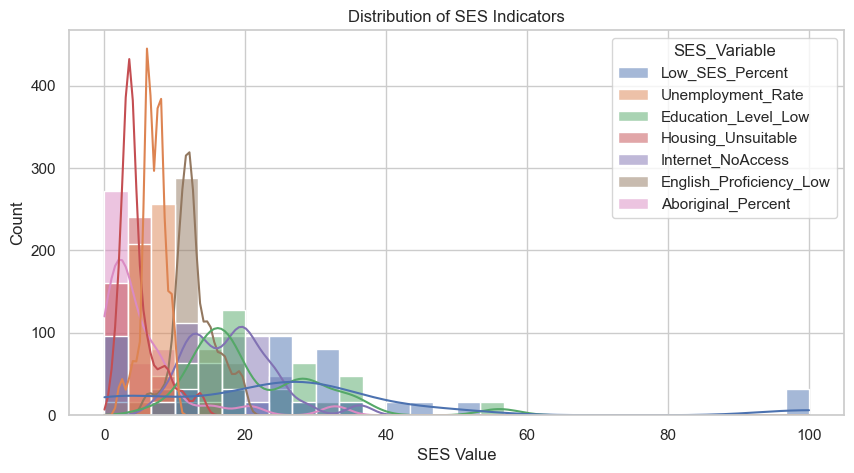

In [92]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x="SES_Value", hue="SES_Variable", bins=30, kde=True)
plt.title("Distribution of SES Indicators")
plt.xlabel("SES Value")
plt.ylabel("Count")
plt.show()

#### Scatter Plot: SES Value vs Death Rate

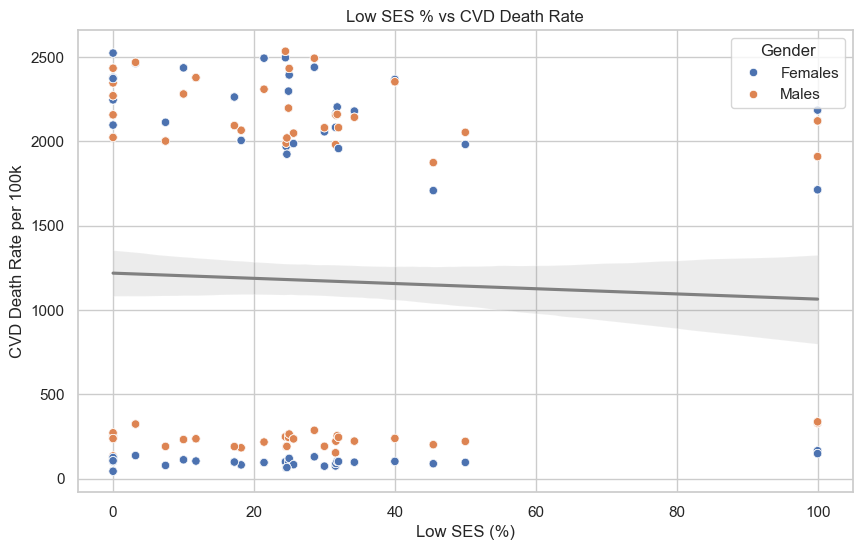

In [93]:
plt.figure(figsize=(10, 6))
subset = df[df["SES_Variable"] == "Low_SES_Percent"]
sns.scatterplot(data=subset, x="SES_Value", y="DeathRatePer100k", hue="Gender")
sns.regplot(data=subset, x="SES_Value", y="DeathRatePer100k", scatter=False, color='gray')
plt.title("Low SES % vs CVD Death Rate")
plt.xlabel("Low SES (%)")
plt.ylabel("CVD Death Rate per 100k")
plt.show()

####  Scatter Plot: SES Value vs Hospitalisations

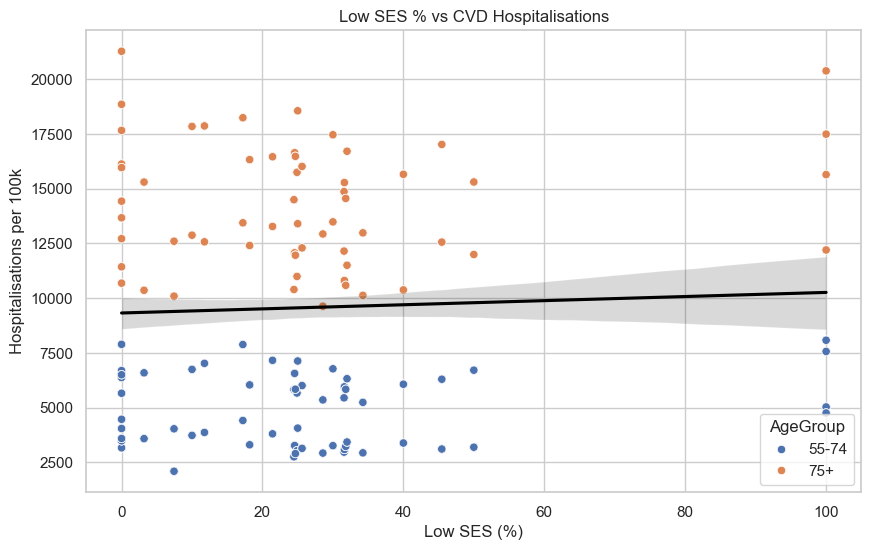

In [94]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=subset, x="SES_Value", y="HospitalisationsPer100k", hue="AgeGroup")
sns.regplot(data=subset, x="SES_Value", y="HospitalisationsPer100k", scatter=False, color='black')
plt.title("Low SES % vs CVD Hospitalisations")
plt.xlabel("Low SES (%)")
plt.ylabel("Hospitalisations per 100k")
plt.show()

#### Box Plot – Compare by Gender

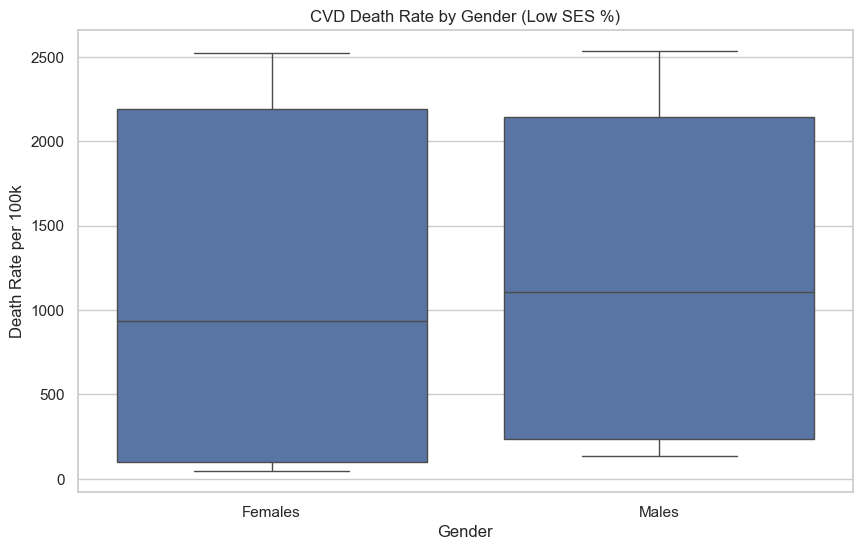

In [95]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=subset, x="Gender", y="DeathRatePer100k")
plt.title("CVD Death Rate by Gender (Low SES %)")
plt.ylabel("Death Rate per 100k")
plt.show()

#### Correlation Heatmap for Numeric Fields

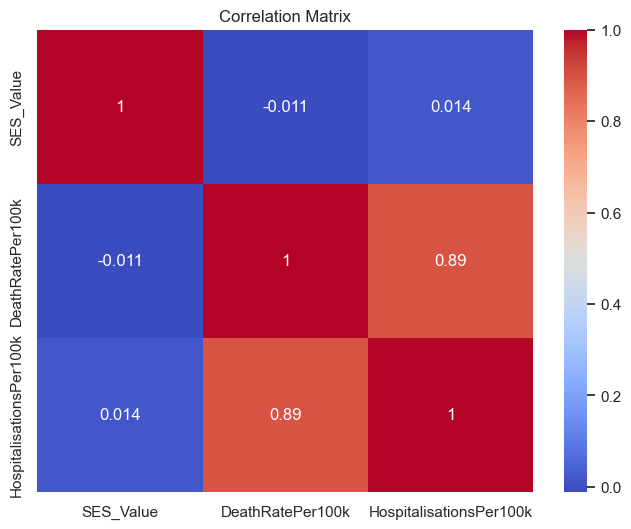

In [96]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[["SES_Value", "DeathRatePer100k", "HospitalisationsPer100k"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()